In [1]:
import numpy as np
import matplotlib.pylab as plt
#%matplotlib inline
import os
import seaborn as sns

import emcee
import corner

from astropy.modeling.models import Voigt1D
import scipy.optimize as op

import sys
sys.path.append('../plotting/')
import spec_helper_functions as shf
import fit_helper_functions as fhf

/anaconda3/lib/python3.5/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/anaconda3/lib/python3.5/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


OVI [6.261296149027151, 1.0117938205827786, 56.029117115988946, 78.33952839034066]


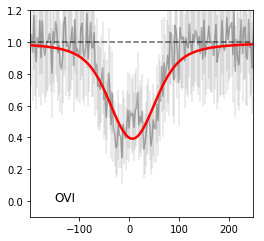

In [3]:
orientation = 'edge_theta0'
#orientation = 'face'
model = 'stream'
radius = 20
ion_list = ['HI', 'CII', 'CIII', 'SiIV', 'NV', 'OVI']
ion_list = ['OVI']
#ion_list = ['CII', 'CIII', 'CII', 'CIII']
vv_list, flux_list, ferr_list, theta_list = fhf.fit_spectrum(model, orientation, radius, ion_list = ion_list, \
                                                             use_errors = True, vmin = -200, vmax = 250, \
                                                             nwalkers = 200, niterations = 200, plot_veeper = False)


HI [5.2957954099206885, 3.002364036683708, 58.49589597904165, 153.42932777980587]


/anaconda3/lib/python3.5/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/anaconda3/lib/python3.5/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


CII [5.109848685594194, 1.0164272175302642, 38.79878395517288, 23.849917184485456]
CIII [2.6072126037379424, 4.75261220589954, 19.896751725624178, 45.7351598914405]
SiIV [-0.38705116380651683, 1.3675992072472272, 23.996475629761264, 29.93859955725304]
NV [3.113475146071396, 1.003409889553189, 46.29435340892882, 39.038409488901124]
OVI [7.98240625821102, 3.012679335565566, 24.81499970502538, 70.9684041043542]
HI [15.60533861761353, 9.319804287253605, 91.48065984580182, 274.45060116676103]
CII [14.105036002626402, 1.4330244245434278, 32.61752468396263, 26.68752302547884]
CIII [9.234186518235092, 3.1151308349637565, 20.378295729129434, 50.83867192436263]
SiIV [12.37125389106657, 3.684077730439882, 8.643658981399653, 21.30618255060885]
NV [-4.157374534189804, 0.41178505163172285, 21.12557506854861, 42.96187420601206]
OVI [39.67638248382601, 0.6156202127546796, 71.68148570298513, 79.19970788135885]
HI [-20.292209742490762, 4.984070734354511, 34.23589433852679, 74.97296868636586]
CII [-15.50

Traceback (most recent call last):
  File "/anaconda3/lib/python3.5/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/Users/irynabutsky/Dropbox/SyntheticSpecCGM/ENZO/scripts/mcmc_voigt/fit_helper_functions.py", line 73, in lnprob
    return lp + lnlike(theta, x, y, yerr)
  File "/Users/irynabutsky/Dropbox/SyntheticSpecCGM/ENZO/scripts/mcmc_voigt/fit_helper_functions.py", line 57, in lnlike
    model = voigt_fit(x, theta, sat_lim = sat_lim)
  File "/Users/irynabutsky/Dropbox/SyntheticSpecCGM/ENZO/scripts/mcmc_voigt/fit_helper_functions.py", line 137, in voigt_fit
    model = 1.0 - Voigt1D(x_0=theta[0], amplitude_L=theta[1], fwhm_L=theta[2], fwhm_G=theta[3])(x)
  File "/anaconda3/lib/python3.5/site-packages/astropy/modeling/core.py", line 382, in __call__
    ('equivalencies', None)])
  File "/anaconda3/lib/python3.5/site-packages/astropy/modeling/core.py", line 363, in __call__
    return super(cls, self).__call__(*inputs, *

KeyboardInterrupt: 

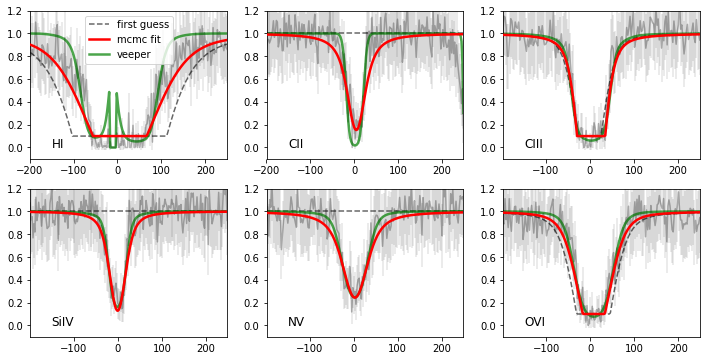

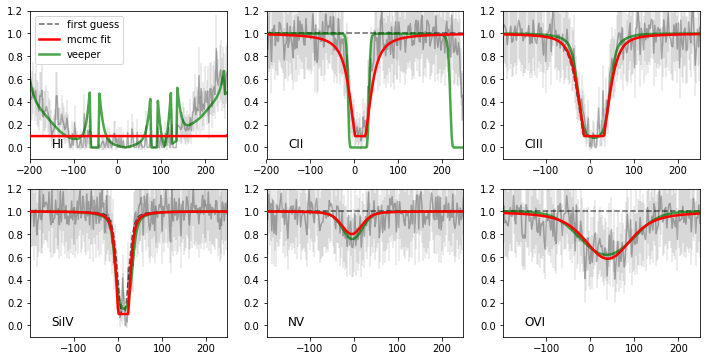

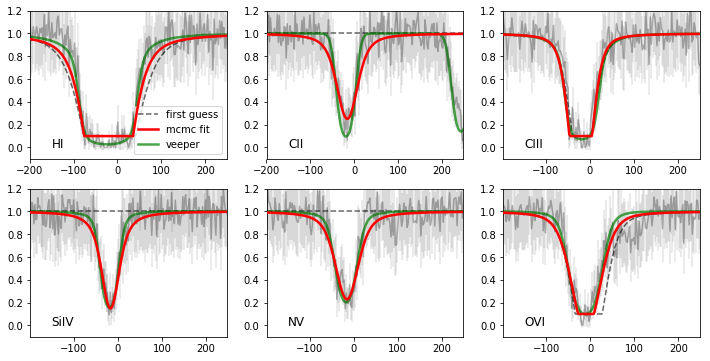

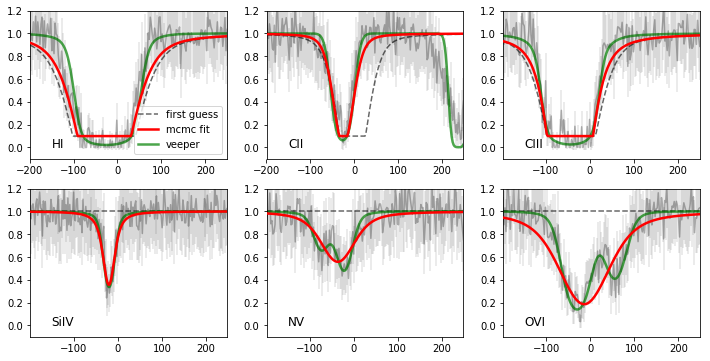

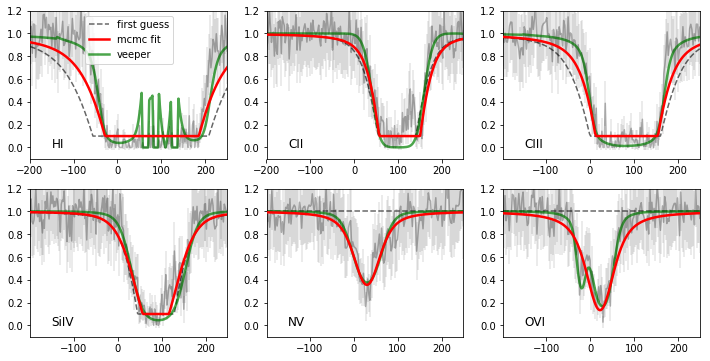

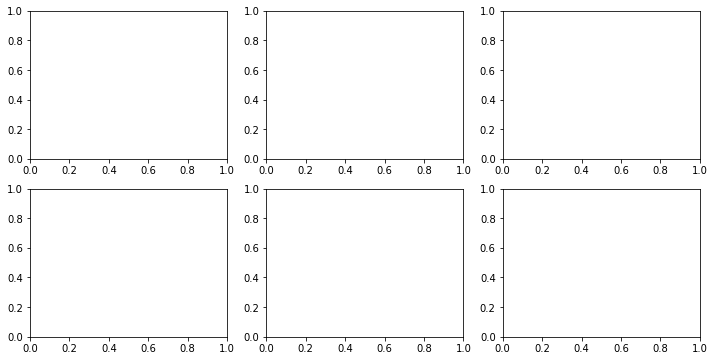

In [2]:
# things to do next time: 
# 1. fix eqwerr; check to see if it flags the same things as "non-detections" in the other workflow
# 2. idea for 2-component: find vcent (already do), and have the two components centered on it
ion_list = ['HI', 'CII', 'CIII', 'SiIV', 'NV', 'OVI']
orientation_list = ['face', 'edge_theta0', 'edge_theta1.0']#, 'edge_theta1.5']
model_list = ['anisd', 'stream']
radius_list = np.arange(10, 50, 10)
for radius in radius_list:
    for orientation in orientation_list:
        for model in model_list:
            vv_list, flux_list, ferr_list, theta_list = fhf.fit_spectrum(model, orientation, radius, ion_list = ion_list, \
                                                             use_errors = True, vmin = -200, vmax = 250, \
                                                             nwalkers = 200, niterations = 200)

In [ ]:
ncols = int(len(ion_list) / 2)
fig, ax = plt.subplots(nrows=2, ncols=ncols, figsize=(12, 6))
for ion, vv, flux, ferr, theta in zip(ion_list, vv_list, flux_list, ferr_list, theta_list):
    plot_fit(vv_ion, flux_ion, ferr_ion, theta, ax = ax[row][col], label = ion, color = 'red')

    

In [ ]:
orientation_list = ['edge_theta1.0', 'edge_theta1.5']
model_list = ['stream', 'anisd']
radius_list = np.arange(10, 50, 10)
ion_list = ['H I', 'Mg II', 'C II', 'Si II', 'Si III', 'Si IV', 'N V']
ion_list = ['H I', 'C II', 'Si II', 'Si III', 'Si IV']

#ion_list = ['H I']
for orientation in orientation_list:
    for model in model_list:
        for radius in radius_list:
            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
            for ion in ion_list:
                vv, flux, vvfit, fluxfit = load_data(orientation, model, radius, ion)
                ax.plot(vv, flux, color = 'black', alpha = 0.2)
                ax.plot(vvfit, fluxfit, label = ion)
                ax.set_xlim(-200, 400)
                ax.legend()
                plt.savefig('../plots/velocity_%s_%s_%i.png'%(model, orientation, radius))
    